In [164]:
# Import the libraries needed
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,make_scorer, precision_score, f1_score ,accuracy_score, classification_report, confusion_matrix

In [165]:
# load our dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [166]:
# split the data into training and testing sets
total_rows = len(df)
train_rows = int(0.6 * total_rows)
test_rows = total_rows - train_rows

training = df[:train_rows]
testing = df[train_rows:]

print("Shape of train:", training.shape)
print("Shape of test:", testing.shape)

Shape of train: (460, 9)
Shape of test: (308, 9)


In [167]:
# sample training set to increase the number of rows
sample_size = 2000

# Perform sampling with replacement
sampled_df = training.sample(n=sample_size, replace=True)
sampled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
238,9,164,84,21,0,30.8,0.831,32,1
175,8,179,72,42,130,32.7,0.719,36,1
235,4,171,72,0,0,43.6,0.479,26,1
235,4,171,72,0,0,43.6,0.479,26,1
66,0,109,88,30,0,32.5,0.855,38,1


In [168]:
# mergre the training data with the sampled data
new_df = pd.concat([training, sampled_df],axis=0)
new_df= new_df.reset_index(drop=True)
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2455,0,102,64,46,78,40.6,0.496,21,0
2456,3,129,64,29,115,26.4,0.219,28,1
2457,0,141,0,0,0,42.4,0.205,29,1
2458,4,114,65,0,0,21.9,0.432,37,0


In [118]:
# check the missing values
new_df = new_df.dropna()
print(new_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [119]:
new_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.860976,121.669512,68.860569,20.617480,82.024797,32.182236,0.490003,32.724797,0.384553
std,3.360564,32.973268,19.243534,15.726374,120.814111,8.199004,0.349253,11.183680,0.486588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.254000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,38.000000,32.300000,0.386500,29.000000,0.000000
75%,6.000000,143.000000,80.000000,33.000000,130.000000,36.800000,0.640000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [120]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


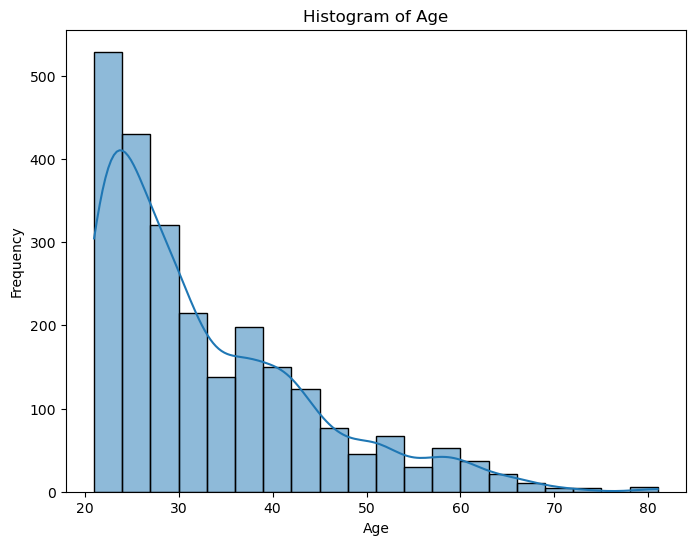

In [121]:
plt.figure(figsize=(8, 6))
sns.histplot(new_df['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

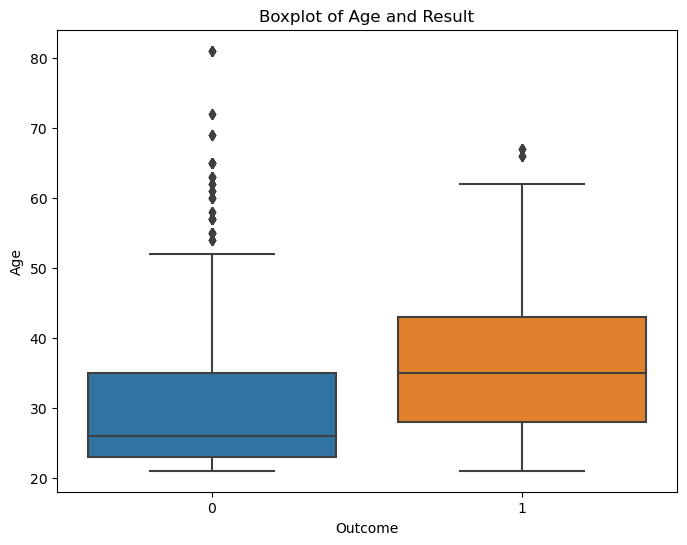

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=new_df)
plt.title('Boxplot of Age and Result')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()


<Figure size 1000x800 with 0 Axes>

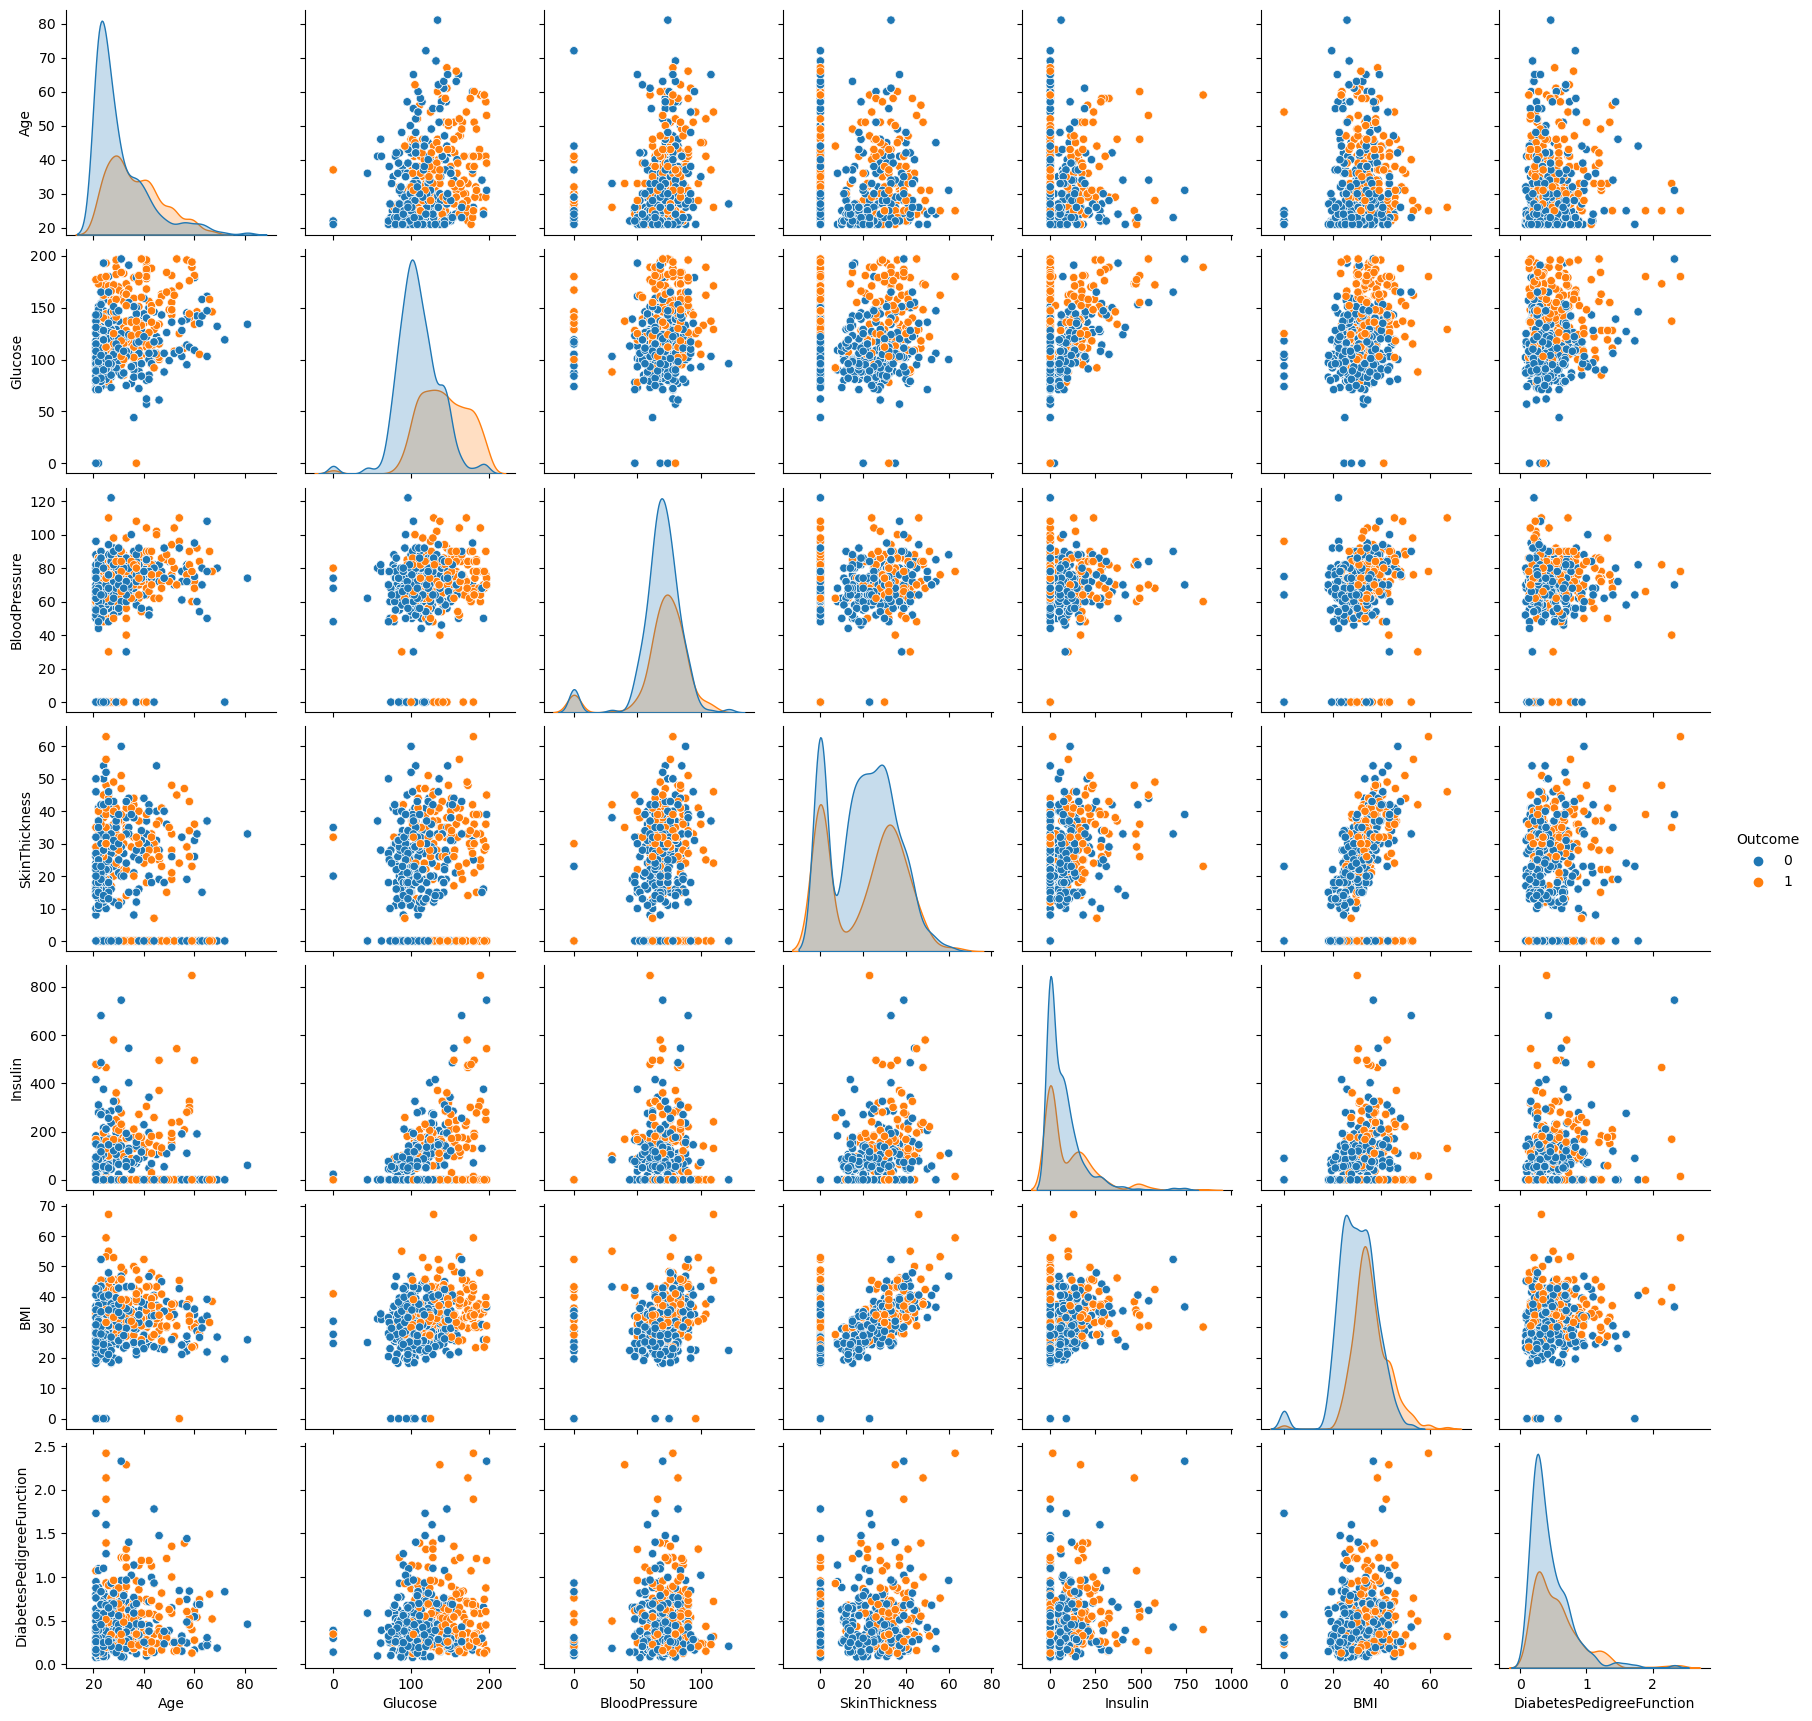

In [123]:
plt.figure(figsize=(10, 8))
sns.pairplot(new_df[['Age', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']], hue='Outcome')
plt.show()


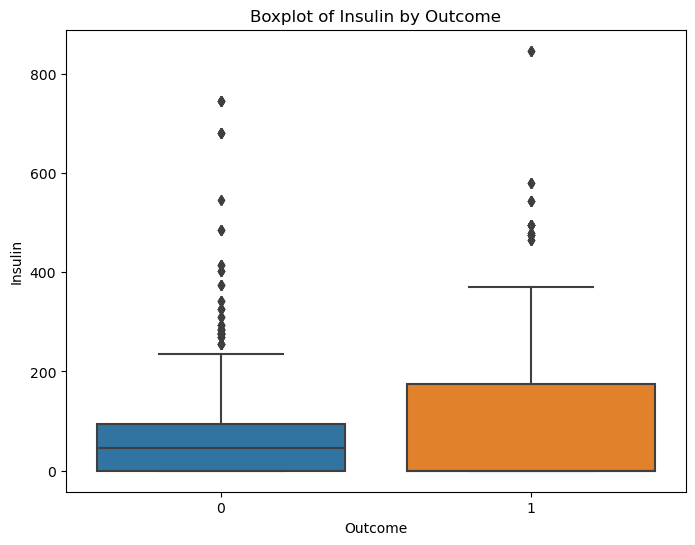

In [124]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Insulin', data=new_df)
plt.title('Boxplot of Insulin by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.show()

In [125]:
# Now let's train our model
X_train = new_df.drop(['Outcome'],axis=1)
y_train = new_df['Outcome']
X_test = testing.drop(['Outcome'],axis=1)
y_test = testing['Outcome']

In [162]:
# prepare some algorithms to see which one has the best performance
KN = KNeighborsClassifier()
LR = LogisticRegression()
DT = DecisionTreeClassifier()
svc = SVC()
algorithms = [KN,LR,DT,svc]

In [140]:
def compare_algorithms(X_train, y_train, algorithms, cv=10, scoring='accuracy'):
    """
    Compare the accuracies of multiple machine learning algorithms using cross-validation.

    Parameters:
    - X: Features (input variables) as a numpy array or pandas DataFrame.
    - y: Target variable as a numpy array or pandas Series.
    - algorithms: List of machine learning algorithms to compare.
    - cv: Number of cross-validation folds (default=10).
    - scoring: Evaluation metric to use (default='accuracy').

    Returns:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    accuracies = {}

    for algorithm in algorithms:
        algorithm.fit(X_train, y_train)
        scores = cross_val_score(algorithm, X_test, y_test, cv=cv, scoring=scoring)
        accuracies[type(algorithm).__name__] = np.mean(scores)

    return accuracies

In [131]:
def plot_accuracies(accuracies):
    """
    Plot a bar graph of accuracies for each algorithm.

    Parameters:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    algorithms = list(accuracies.keys())
    scores = list(accuracies.values())

    plt.figure(figsize=(10, 6))
    plt.barh(algorithms, scores, color='skyblue')
    plt.xlabel('Accuracy')
    plt.ylabel('Algorithm')
    plt.title('Accuracy of Machine Learning Algorithms')
    plt.xlim(0, 1)  # Set x-axis limits to range from 0 to 1
    plt.show()

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

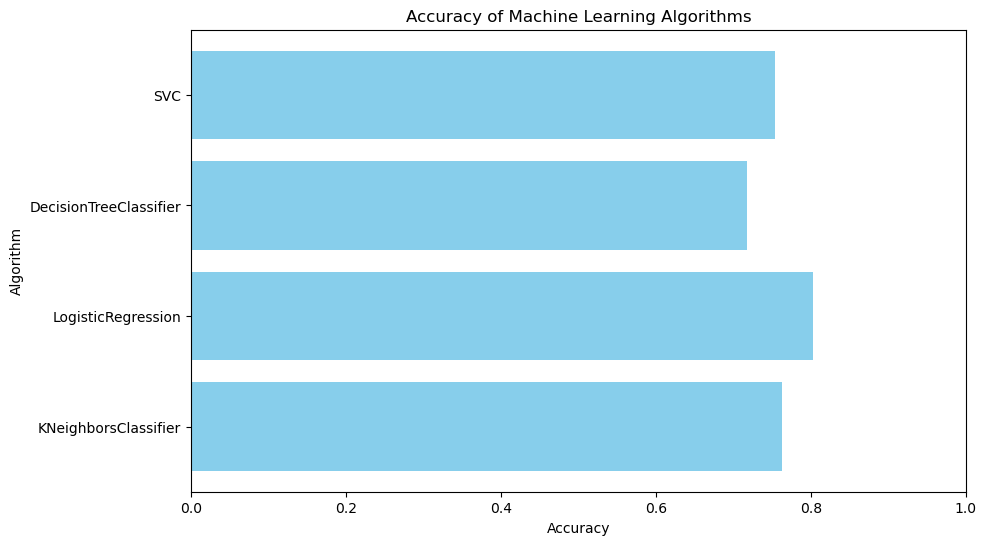

In [141]:
# Compare algorithms and plot accuracies
accuracies = compare_algorithms(X_train, y_train, algorithms)
plot_accuracies(accuracies)

In [142]:
print("Accuracies:", accuracies)

Accuracies: {'KNeighborsClassifier': 0.7624731182795699, 'LogisticRegression': 0.8021505376344086, 'DecisionTreeClassifier': 0.7173118279569893, 'SVC': 0.7531182795698925}


In [143]:
model = LR.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.801948051948052


h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       215
           1       0.70      0.60      0.65        93

    accuracy                           0.80       308
   macro avg       0.77      0.75      0.75       308
weighted avg       0.80      0.80      0.80       308



In [145]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[191  24]
 [ 37  56]]


In [147]:
outcome_counts = new_df['Outcome'].value_counts()

# Print the counts
print("Counts of ones and zeros in the 'Outcome' column:")
print(outcome_counts)

Counts of ones and zeros in the 'Outcome' column:
0    1514
1     946
Name: Outcome, dtype: int64


In [ ]:
# time to try improve our performance

In [157]:
# improve performance using the GridSearchCV technique
param_grid = {
    'penalty': ['l1', 'l2','13','14'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm for optimization
}

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: Convergen

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', '13', '14'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [158]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-Validation Score:", best_score)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.765040650406504
Test Set Score: 0.8051948051948052
